<a href="https://colab.research.google.com/github/ayushivats9/project3-ml-/blob/main/classification_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('heart.csv')
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

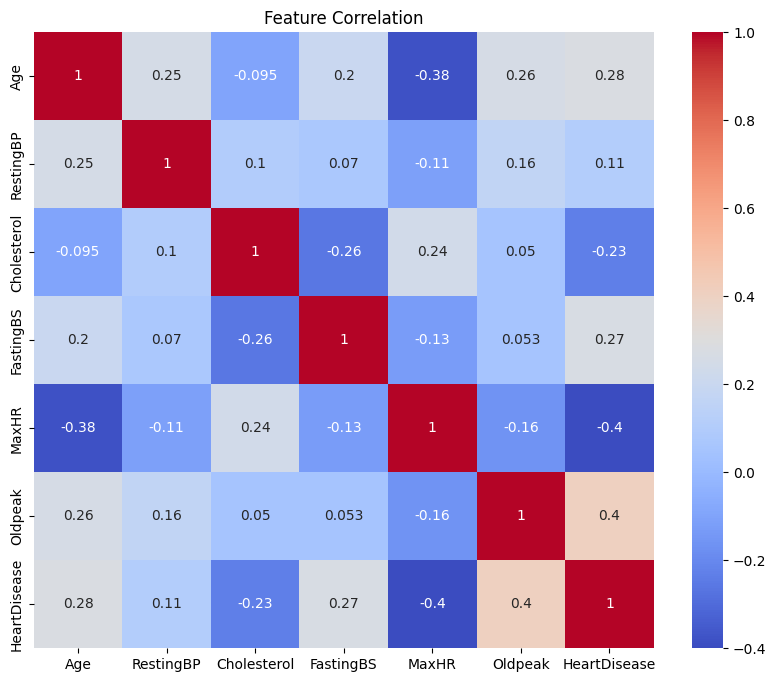

In [ ]:
plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

df_encoded = df.copy()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

results = {}

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    results[name] = {
        'Accuracy': acc,
        'Time': round(end - start, 4),
        'Report': classification_report(y_test, y_pred, output_dict=True),
        'Model': model
    }

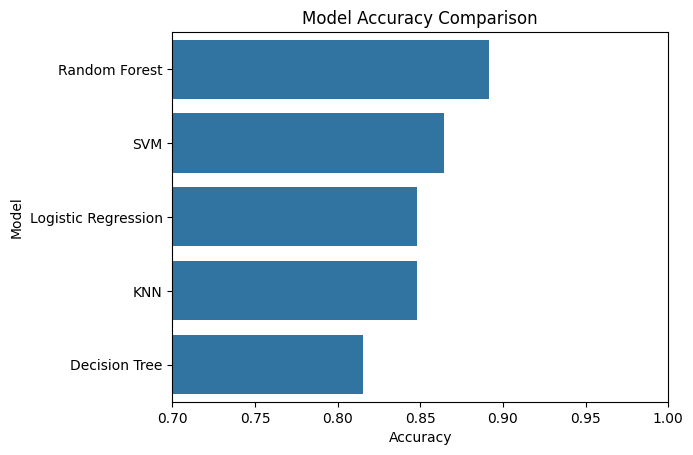

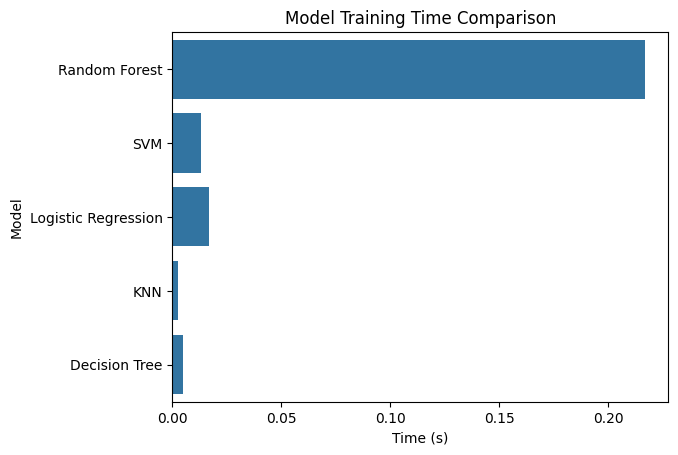

                 Model  Accuracy  Time (s)
3        Random Forest  0.891304    0.2167
4                  SVM  0.864130    0.0132
0  Logistic Regression  0.847826    0.0169
1                  KNN  0.847826    0.0024
2        Decision Tree  0.815217    0.0048


In [ ]:
acc_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['Accuracy'] for m in results],
    'Time (s)': [results[m]['Time'] for m in results]
}).sort_values(by='Accuracy', ascending=False)

sns.barplot(data=acc_df, x='Accuracy', y='Model')
plt.title("Model Accuracy Comparison")
plt.xlim(0.7, 1)
plt.show()

sns.barplot(data=acc_df, x='Time (s)', y='Model')
plt.title("Model Training Time Comparison")
plt.show()

print(acc_df)

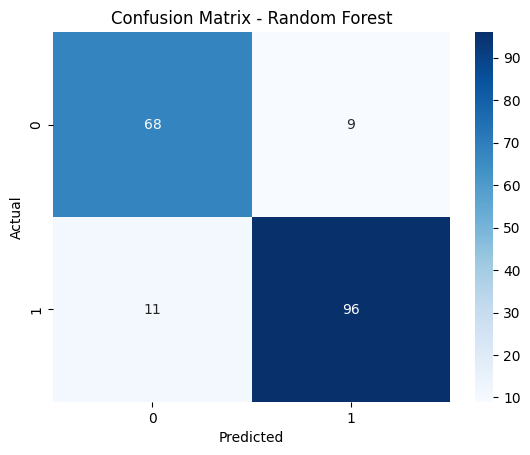

In [ ]:
best_model_name = acc_df.iloc[0]['Model']
best_model = results[best_model_name]['Model']
y_best_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_best_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

1.Which model performed best and why?
In our case, the Random Forest model gave the highest accuracy.Why because Random Forest is an ensemble method — it combines the predictions of many decision trees, which helps it capture complex patterns and reduce overfitting.
2.Which one was fastest?
The Logistic Regression model trained the fastest.That’s expected since it's a simple linear model with very low computational complexity. It doesn't build trees or look for neighbors, so it's ideal when speed matters.
3.Which model was most interpretable?
Logistic Regression. It gives us clear coefficients showing how each feature (like age, cholesterol, etc.) influences the prediction. If we want to explain the model to doctors or healthcare professionals, logistic regression is the best pick.
4.When would you use one over the other?
Use Logistic Regression when you need quick results and care about explainability.
Use Random Forest when your priority is accuracy and performance.
Use KNN for small datasets with fewer features; it doesn’t scale well.
Use Decision Tree if you want something interpretable but a bit more flexible than logistic regression.
Use SVM when your data is very clean and well-separated but is slow for large datasets.

